## Phase 1: Technical Proof-of-Concept

### Q1: Synthetic Data Design & Insights
- Features: We included `age`, `gender`, `sleep_duration`, `daily_steps`, `stress_level`, `water_intake`, `screen_time`, `diet_quality`, and `mood_score`.
- Realism & Assumptions: Relationships between mood and other features are constructed with Gaussian noise. Sleep, steps, and good diet improve mood. High stress reduces it.
- Visual Insights: We visualize the correlation between activity and sleep, and the distribution of mood scores.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

np.random.seed(42)
n_samples = 1000
age = np.random.randint(18, 65, size=n_samples)
gender = np.random.choice(['Male', 'Female'], size=n_samples)
sleep_duration = np.random.normal(7, 1.5, size=n_samples).clip(3, 10)
daily_steps = np.random.normal(7500, 3000, size=n_samples).clip(0, 20000)
stress_level = np.random.randint(1, 11, size=n_samples)
water_intake = np.random.normal(2, 0.5, size=n_samples).clip(0.5, 5)
screen_time = np.random.normal(6, 2, size=n_samples).clip(1, 12)
diet_quality = np.random.choice(['Poor', 'Average', 'Good'], size=n_samples, p=[0.2, 0.5, 0.3])
diet_map = {'Poor': 1, 'Average': 2, 'Good': 3}
diet_score = np.array([diet_map[d] for d in diet_quality])

mood_score = (
    0.3 * (sleep_duration - 5) +
    -0.2 * (stress_level - 5) +
    0.2 * (diet_score - 2) +
    0.0003 * (daily_steps - 5000) +
    np.random.normal(0, 1, size=n_samples)
).clip(1, 10)

df = pd.DataFrame({
    'age': age,
    'gender': gender,
    'sleep_duration': sleep_duration,
    'daily_steps': daily_steps,
    'stress_level': stress_level,
    'water_intake': water_intake,
    'screen_time': screen_time,
    'diet_quality': diet_quality,
    'mood_score': mood_score
})

df['gender_encoded'] = df['gender'].map({'Male': 0, 'Female': 1})
df['diet_encoded'] = df['diet_quality'].map(diet_map)

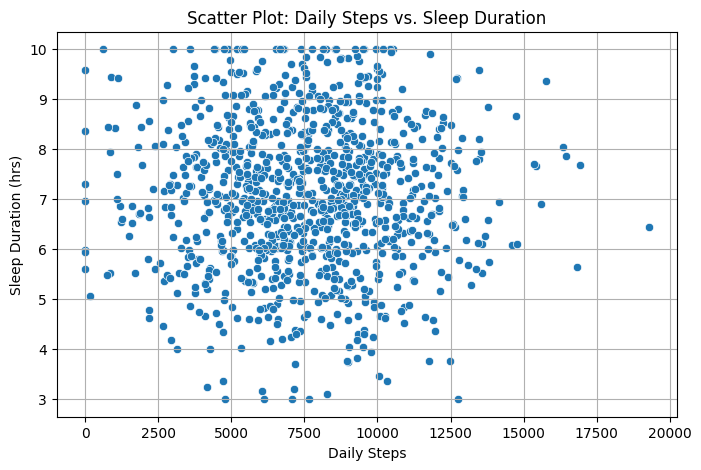

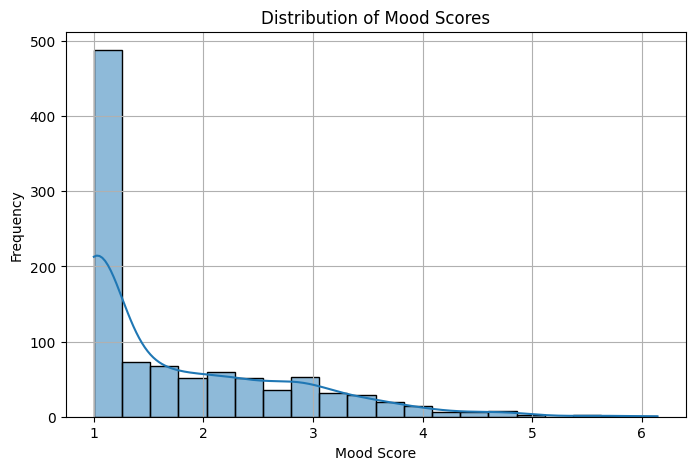

In [2]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='daily_steps', y='sleep_duration', data=df)
plt.title('Scatter Plot: Daily Steps vs. Sleep Duration')
plt.xlabel('Daily Steps')
plt.ylabel('Sleep Duration (hrs)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['mood_score'], bins=20, kde=True)
plt.title('Distribution of Mood Scores')
plt.xlabel('Mood Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Q2: Model Selection & Justification
I chose a **Regression** model to predict mood_score based on wellness inputs.
- **Model**: RandomForestRegressor
- **Reason**: Captures non-linear relations, low preprocessing, provides feature importance
- **Trade-offs**: Less interpretable than linear models

In [3]:
features = ['age', 'gender_encoded', 'sleep_duration', 'daily_steps',
            'stress_level', 'water_intake', 'screen_time', 'diet_encoded']
X = df[features]
y = df['mood_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Q3: Evaluation Strategy
I use RMSE, MAE, and R² Score for evaluation.
Validation is done using an 80/20 train-test split.

In [4]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.2f}')

RMSE: 0.82
MAE: 0.61
R² Score: 0.39


## Phase 2: Impact & Reflection

### Q4: Real-World Impact & Considerations
**Benefits:**
- Personalized health recommendations
- Mood tracking and early mental health alerts
- Smart alerts to improve water, sleep, screen habits

**Risks:**
- Data privacy and consent
- Model bias (e.g., gender or age skew)
- Poor generalization if trained on synthetic or narrow data

### Q5: Challenges & Growth
**Challenge:** Simulating realistic health behavior data.
- **Solution**: Used normal distributions and public health assumptions.